In [32]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-05-04 19:21:22--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2024-05-04 19:21:22 (143 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [33]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [34]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [35]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [36]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 24)                1560      
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 32s 45ms/step - loss: 0.4237 - accuracy: 0.7908 - val_loss: 0.3277 - val_accuracy: 0.8566
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2207 - accuracy: 0.9105 - val_loss: 0.3441 - val_accuracy: 0.8590
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.1403 - accuracy: 0.9478 - val_loss: 0.3780 - val_accuracy: 0.8527
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0854 - accuracy: 0.9696 - val_loss: 0.5490 - val_accuracy: 0.8427
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0512 - accuracy: 0.9829 - val_loss: 0.6295 - val_accuracy: 0.8433
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.6781 - val_accuracy: 0.8363
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 0.7875 - val_accuracy: 0.83

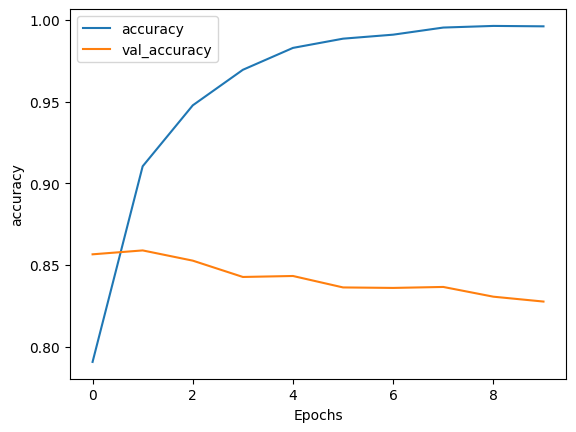

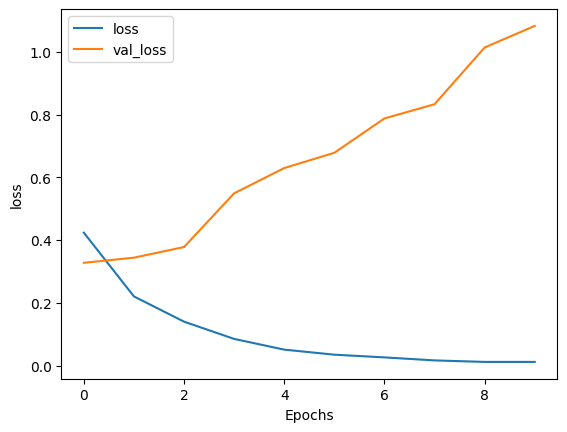

In [38]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')